Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Azat Akhmadullin"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [15]:
import numpy as np

def l_k(xk, k, x):
    value = 1.
    for i, point in enumerate(xk):
        if i != k:
            value *= (x - point) / (xk[k] - point) 
    return value

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk)
        return sum([self.yk[i] * l_k(self.xk, i, x) for i in range(n)])
        

In [16]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


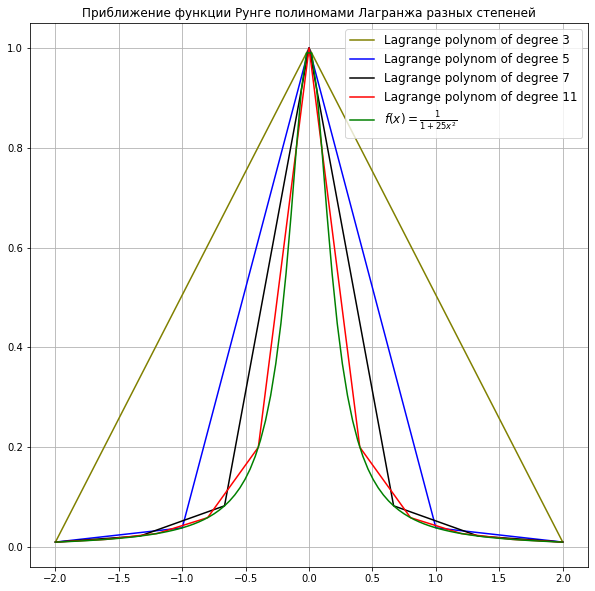

In [47]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
import matplotlib.pyplot as plt
degrees = [3, 5, 7, 11]
cols = ["olive", "blue", "black", "red"]

plt.figure(figsize=(10, 10))
plt.title("Приближение функции Рунге полиномами Лагранжа разных степеней", fontsize=12)
for i, m in enumerate(degrees):
    xx = np.linspace(-2, 2, m)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    y_interpolated = [lagr(x) for x in xx]
    plt.plot(xx, y_interpolated, color=cols[i], \
             label='Lagrange polynom of degree %i' % m)

xx = np.linspace(-2, 2, 100)
yy = runge_func(xx)
plt.grid(True)
plt.plot(xx, yy, color='green', label="$ f(x) = \\frac{1}{1 + 25x^2} $")
plt.legend(fontsize=12)
plt.show()

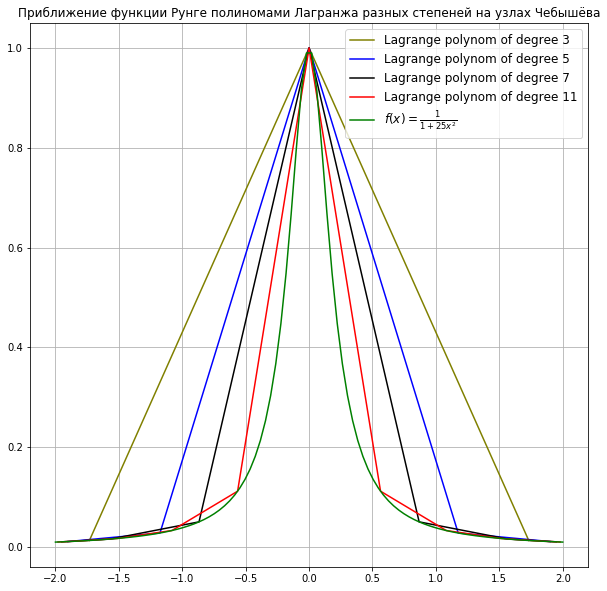

In [58]:
degrees = [3, 5, 7, 11]
cols = ["olive", "blue", "black", "red"]

plt.figure(figsize=(10, 10))
plt.title("Приближение функции Рунге полиномами Лагранжа разных степеней на узлах Чебышёва", fontsize=12)
for i, m in enumerate(degrees):
    xx = np.array([np.cos((2*k + 1) / (2*m) * np.pi) for k in range(m)])
    
    xx = 4. / 2. * xx
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    y_interpolated = [lagr(x) for x in xx]
    
    plt.plot(xx, y_interpolated, color=cols[i], \
             label='Lagrange polynom of degree %i' % m)

xx = np.linspace(-2, 2, 100)
yy = runge_func(xx)
plt.grid(True)
plt.plot(xx, yy, color='green', label="$ f(x) = \\frac{1}{1 + 25x^2} $")
plt.legend(fontsize=12)
plt.show()